In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'C:/Users/baoth/Desktop/Learnmore/DS/machine_learning_PS/data/exams.csv'

In [3]:
df = pd.read_csv(data_path)
df.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
661,male,group E,some high school,free/reduced,none,69,67,60
712,female,group B,bachelor's degree,standard,completed,80,87,96
590,male,group E,bachelor's degree,standard,none,79,65,67


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.700000,69.478000,68.432000
std,15.583673,14.707271,15.005417
min,11.000000,7.000000,5.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,69.000000,68.500000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
from sklearn import preprocessing

df[['math score']] = preprocessing.scale(df[['math score']].astype('float'))
df[['reading score']] = preprocessing.scale(df[['reading score']].astype('float'))
df[['writing score']] = preprocessing.scale(df[['writing score']].astype('float'))

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,high school,standard,none,-0.751161,0.035510,-0.362184
1,male,group C,bachelor's degree,standard,none,2.137921,1.123952,0.904659
2,male,group B,some college,standard,none,0.276068,-0.780821,-0.828915
3,female,group D,some high school,standard,none,-0.044941,-0.032517,0.637955
4,female,group C,associate's degree,standard,none,-1.136372,-0.712793,-0.828915


In [7]:
df['parental level of education'].unique()

array(['high school', "bachelor's degree", 'some college',
       'some high school', "associate's degree", "master's degree"],
      dtype=object)

In [8]:
parental_level_of_education = ['high school', "bachelor's degree", 'some college','some high school', "associate's degree", "master's degree"]

In [10]:
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(parental_level_of_education)

In [11]:
df['parental level of education'] = encoder.transform(df['parental level of education'].astype(str))

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,2,standard,none,-0.751161,0.035510,-0.362184
1,male,group C,1,standard,none,2.137921,1.123952,0.904659
2,male,group B,4,standard,none,0.276068,-0.780821,-0.828915
3,female,group D,5,standard,none,-0.044941,-0.032517,0.637955
4,female,group C,0,standard,none,-1.136372,-0.712793,-0.828915


In [13]:
df = pd.get_dummies(df,columns=['race/ethnicity'])
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,2,standard,none,-0.751161,0.035510,-0.362184,0,0,0,0,1
1,male,1,standard,none,2.137921,1.123952,0.904659,0,0,1,0,0
2,male,4,standard,none,0.276068,-0.780821,-0.828915,0,1,0,0,0
3,female,5,standard,none,-0.044941,-0.032517,0.637955,0,0,0,1,0
4,female,0,standard,none,-1.136372,-0.712793,-0.828915,0,0,1,0,0


In [14]:
df = pd.get_dummies(df,columns=['gender','lunch','test preparation course'])
df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,2,-0.751161,0.035510,-0.362184,0,0,0,0,1,1,0,0,1,0,1
1,1,2.137921,1.123952,0.904659,0,0,1,0,0,0,1,0,1,0,1
2,4,0.276068,-0.780821,-0.828915,0,1,0,0,0,0,1,0,1,0,1
3,5,-0.044941,-0.032517,0.637955,0,0,0,1,0,1,0,0,1,0,1
4,0,-1.136372,-0.712793,-0.828915,0,0,1,0,0,1,0,0,1,0,1


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('math score',axis=1)
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

In [17]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(X_train,y_train)

In [18]:
print('Training score: ',linear_model.score(X_train,y_train))

Training score:  0.8717543247798428


In [19]:
y_pred = linear_model.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

print('testing score: ',r2_score(y_test,y_pred))

testing score:  0.8975798511117717


In [21]:
linear_model = LinearRegression(fit_intercept=False).fit(X_train,y_train)
print('Training score: ',linear_model.score(X_train,y_train))
y_pred = linear_model.predict(X_test)
print('testing score: ',r2_score(y_test,y_pred))

Training score:  0.8717543247798428
testing score:  0.8975798511117719


In [22]:
pred_results = pd.DataFrame({'y_pred':y_pred,'y_test':y_test})

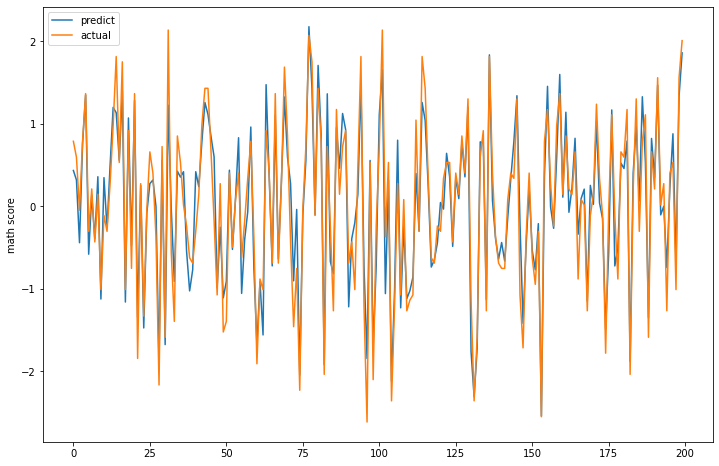

In [23]:
plt.figure(figsize=(12,8))

plt.plot(y_pred,label='predict')
plt.plot(y_test.values, label='actual')

plt.ylabel('math score')
plt.legend()